In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Mortgage_Default/Mortgage_Default/Data_and_Cleaning/revised_mort_data.csv')

In [5]:
df

,Unnamed: 0,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,ratio_paid
0,0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,...,0,45000.0,715,69.4,9.200,87.03,1,0,0,0.082146
1,1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,...,0,107200.0,558,80.0,7.680,186.91,0,1,1,0.012814
2,2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,...,0,48600.0,680,83.6,8.750,89.58,0,1,1,0.076828
3,4,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,...,0,52800.0,527,80.0,9.155,186.91,0,1,1,0.009563
4,5,6,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,...,0,212000.0,670,80.0,6.580,191.42,1,0,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,46281,49966,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,...,1,103200.0,726,80.0,6.875,226.29,1,0,0,0.093329
38054,46284,49970,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,...,1,86600.0,672,80.0,7.500,226.29,0,1,1,0.099257
38055,46286,49972,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,...,0,196000.0,708,79.8,7.500,226.29,1,0,0,0.078198
38056,46297,49983,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,...,0,232000.0,665,74.8,6.500,155.77,0,1,1,0.139129


In [6]:
cols_drop = ['Unnamed: 0', 'id', 'default_time', 'payoff_time', 'ratio_paid']

In [7]:
df.drop(columns=cols_drop, inplace=True)

In [8]:
df

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,1
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,1
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,1
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,0
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,1
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,0
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,1


In [23]:
# df.to_csv('/Users/wickedbear/Coding/Projects/Mortgage_Default/Data_and_Cleaning/clean_data.csv')

In [9]:
y = df['status_time']
X = df.drop('status_time', axis=1)
X.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42


In [10]:
X.isna().sum()

balance_time               0
LTV_time                   0
interest_rate_time         0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
dtype: int64

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)


ada_cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv=3)
mean_ada_cv_score = np.mean(ada_cv_score)

gdb_cv_score = cross_val_score(gbt_clf, X_train, y_train, cv=3)
mean_gdb_cv_score = np.mean(gdb_cv_score)


print(f"Mean Cross Validation Score: {mean_ada_cv_score :.2%}")
print(f"Mean Cross Validation Score: {mean_gdb_cv_score :.2%}")

Mean Cross Validation Score: 73.71%
Mean Cross Validation Score: 74.23%


In [13]:
mean_ada_cv_score

0.7370982654908698

In [14]:
mean_gdb_cv_score

0.742283488606652

In [15]:
adaboost_clf.fit(X_train, y_train)
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
acf = adaboost_clf.fit(X_train, y_train)
dcf = gbt_clf.fit(X_train, y_train)

In [16]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [17]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7406369337490804
F1-Score: 0.7935064572815262

Model: Gradient Boosted Trees
Accuracy: 0.750201450443191
F1-Score: 0.8014480646059593

Testing Metrics
Model: AdaBoost
Accuracy: 0.7362059905412507
F1-Score: 0.7904141616566466

Model: Gradient Boosted Trees
Accuracy: 0.7437729900157646
F1-Score: 0.7964261857047428


In [18]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[2272, 1343],
       [1167, 4733]])

In [19]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[2308, 1307],
       [1131, 4769]])

In [20]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.66      0.63      0.64      3615
           1       0.78      0.80      0.79      5900

    accuracy                           0.74      9515
   macro avg       0.72      0.72      0.72      9515
weighted avg       0.73      0.74      0.73      9515



In [21]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3615
           1       0.78      0.81      0.80      5900

    accuracy                           0.74      9515
   macro avg       0.73      0.72      0.73      9515
weighted avg       0.74      0.74      0.74      9515



In [27]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X_test, y_test, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.7289542827115081


In [26]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X_test, y_test, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.7375722543352601


In [38]:
X_test

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
21459,173999.50,71.899793,7.700,186.91,3.370511,5.5,0,0,0,0,174000.0,558,71.9,7.700,186.91
10039,1385091.38,82.396001,5.250,217.37,1.692969,4.5,0,0,1,0,1400000.0,614,80.0,0.000,226.29
36588,48378.24,41.066923,9.725,208.86,3.346929,5.2,0,1,0,0,50000.0,597,70.4,9.725,125.92
25292,239900.00,80.000000,6.250,226.29,2.899137,4.7,0,0,0,0,239900.0,682,80.0,6.250,226.29
10608,648821.60,55.305956,6.500,226.29,2.899137,4.7,0,1,0,0,650000.0,781,56.5,6.500,221.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12369,508000.00,80.990577,7.250,219.67,1.229172,4.6,1,0,0,0,508000.0,637,80.0,7.250,222.39
26004,335080.00,81.402941,6.500,222.39,2.361722,4.4,0,0,0,0,335080.0,802,80.0,6.500,226.29
14806,127999.99,68.903194,5.000,186.91,3.370511,5.5,0,0,1,0,128000.0,738,76.7,5.000,167.91
33735,116995.44,94.083204,8.900,212.73,2.274218,4.7,0,0,1,0,117000.0,606,90.0,8.900,222.39


Test AUC: 0.7233779918887873


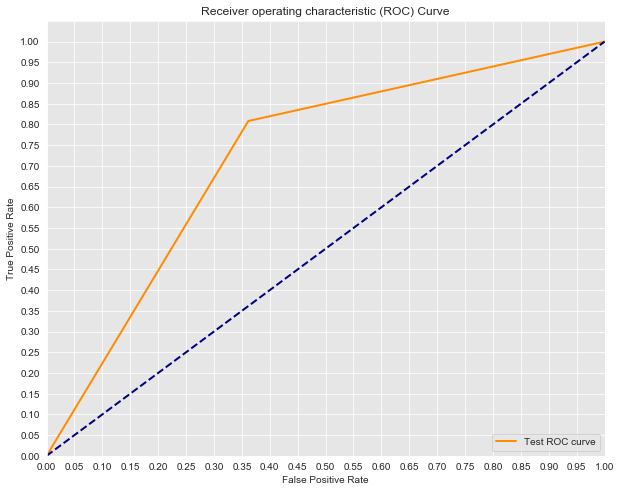

In [40]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, gbt_clf_test_preds)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Test AUC: 0.7153478913191269


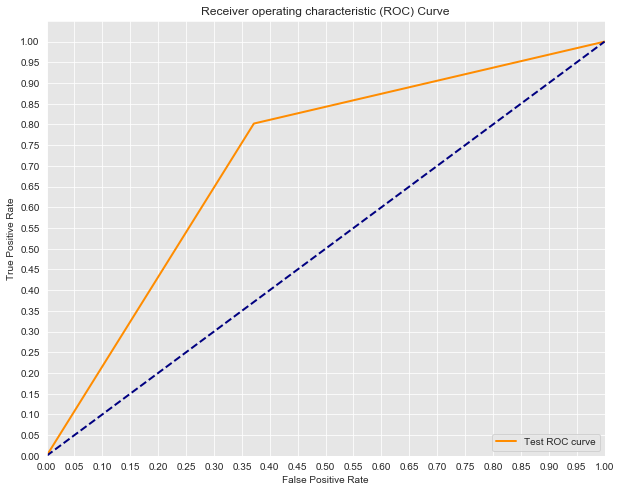

In [41]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, adaboost_test_preds)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Test AUC: 0.7233779918887873


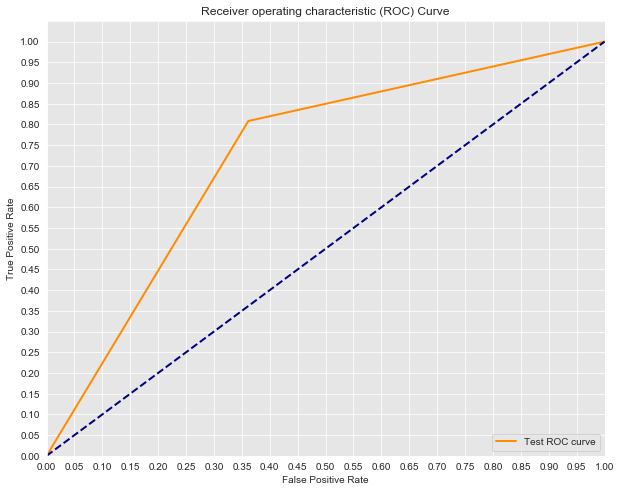

In [51]:
from sklearn.linear_model import LogisticRegression

ada = adaboost_test_preds
gbt = gbt_clf_test_preds

# train_fpr, train_tpr, train_thresholds = roc_curve(y_train, ada)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train, gbt)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, ada)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, gbt)

# print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

# plt.plot(train_fpr, train_tpr, color='blue',
#          lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[[2308 1131]
 [1307 4769]]


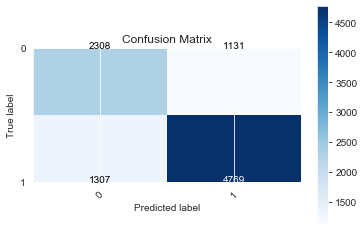

In [53]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix



cnf_matrix = confusion_matrix(gbt, y_test)

print(cnf_matrix)

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [55]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[0.67112533 0.32887467]
 [0.21510862 0.78489138]]


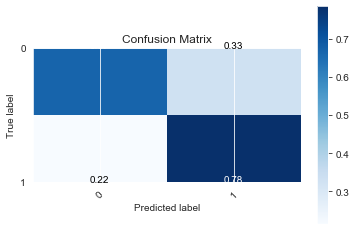

In [57]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [58]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [87]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77


In [88]:
y

0        0
1        1
2        1
3        1
4        0
        ..
38053    0
38054    1
38055    0
38056    1
38057    1
Name: status_time, Length: 38058, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [90]:
gbt_clf = GradientBoostingClassifier(random_state=42)

gbt_cv_score = cross_val_score(gbt_clf, X_train, y_train, cv=3)
mean_gbt_cv_score = np.mean(gbt_cv_score)

print(f"Mean Cross Validation Score: {mean_gbt_cv_score :.2%}")

Mean Cross Validation Score: 74.23%


In [91]:
gbt_cv_score

array([0.74598003, 0.7397793 , 0.74109114])

In [119]:
dt_param_grid = {

    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [120]:
# Instantiate GridSearchCV
gbt_grid_search = GridSearchCV(gbt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
gbt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [ ]:
grid_result = grid.fit(X, Y)

In [121]:
# Mean training score
gbt_gs_training_score = np.mean(gbt_grid_search.cv_results_['mean_train_score'])

# Mean test score
gbt_gs_testing_score = gbt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {gbt_gs_training_score :.2%}")
print(f"Mean Test Score: {gbt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
gbt_grid_search.best_params_

Mean Training Score: 80.67%
Mean Test Score: 74.20%
Best Parameter Combination Found During Grid Search:


{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [127]:
gbt_clf = GradientBoostingClassifier(random_state=42)
mean_gbt_cv_score = np.mean(cross_val_score(gbt_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for GBT Classifier: {mean_gbt_cv_score :.2%}")

Mean Cross Validation Score for GBT Classifier: 74.23%


In [128]:
gbt_clf = GradientBoostingClassifier(random_state=43)
mean_gbt_cv_score2 = np.mean(cross_val_score(gbt_clf, X_test, y_test, cv=3))

print(f"Mean Cross Validation Score for GBT Classifier: {mean_gbt_cv_score2 :.2%}")

Mean Cross Validation Score for GBT Classifier: 73.73%


In [131]:
gbt_param_grid = {
    'n_estimators': [10, 30, 100],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [134]:
gbt_grid_search = GridSearchCV(gbt_clf, gbt_param_grid, cv=3, refit=True, return_train_score=True)
gbt_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {gbt_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {gbt_grid_search.best_params_}")

Training Accuracy: 74.20%

Optimal Parameters: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


In [135]:
gbt_score = gbt_grid_search.score(X_test, y_test)

print('GBT grid search: ', gbt_score)

GBT grid search:  0.7448239621650026


In [143]:
df.status_time.value_counts()

1    23527
0    14531
Name: status_time, dtype: int64

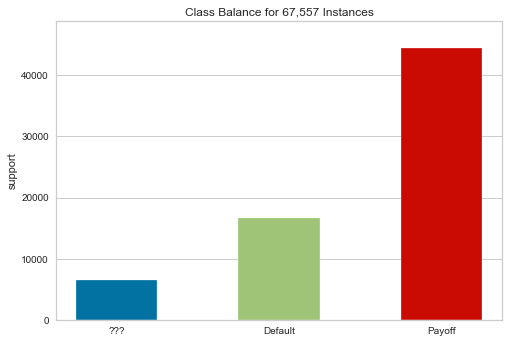

In [144]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["???", "Default", "Payoff"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure